[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/elcursodeia-code/blob/master/dl/02_frameworks.ipynb)

# Frameworks

## Keras

In [26]:
import os

os.environ["KERAS_BACKEND"] = "torch"

In [27]:
import keras

keras.__version__

'3.5.0'

> Necesita tensorflow igualemente (`pip installtensorflow-cpu`)


In [28]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [29]:
X_train_full.shape, X_train_full.dtype, X_train_full.max(), X_train_full.min()

((60000, 28, 28), dtype('uint8'), 255, 0)

In [30]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [6]:
X_valid.shape, X_test.shape

((5000, 28, 28), (10000, 28, 28))

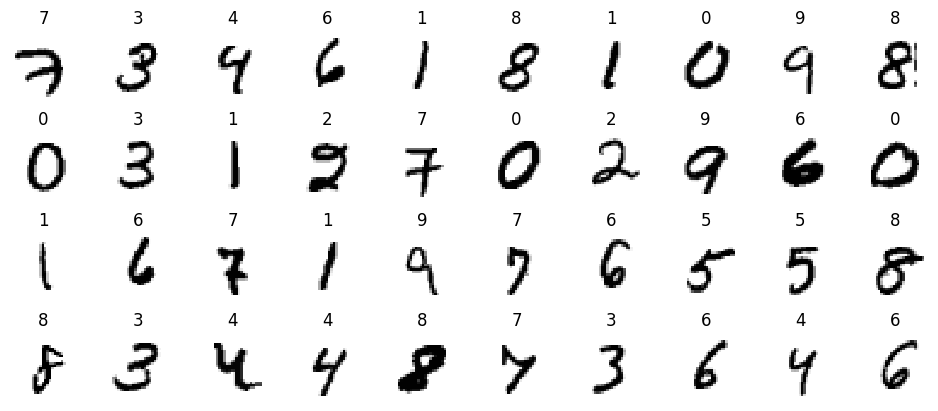

In [7]:
import matplotlib.pyplot as plt

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/home/juan/miniconda3/envs/pt/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [12]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [13]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.9811 - sparse_categorical_accuracy: 0.7514 - val_loss: 0.2972 - val_sparse_categorical_accuracy: 0.9164
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2981 - sparse_categorical_accuracy: 0.9159 - val_loss: 0.2318 - val_sparse_categorical_accuracy: 0.9342
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2401 - sparse_categorical_accuracy: 0.9321 - val_loss: 0.1964 - val_sparse_categorical_accuracy: 0.9446
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2034 - sparse_categorical_accuracy: 0.9421 - val_loss: 0.1861 - val_sparse_categorical_accuracy: 0.9480
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1724 - sparse_categorical_accuracy: 0.9508 - val_loss: 0.1574 - val_sparse_categorical_accuracy: 0.9578
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1572 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.1416 - val_sparse_categorical_accuracy:

In [14]:
history.params

{'verbose': 'auto', 'epochs': 10, 'steps': 1719}

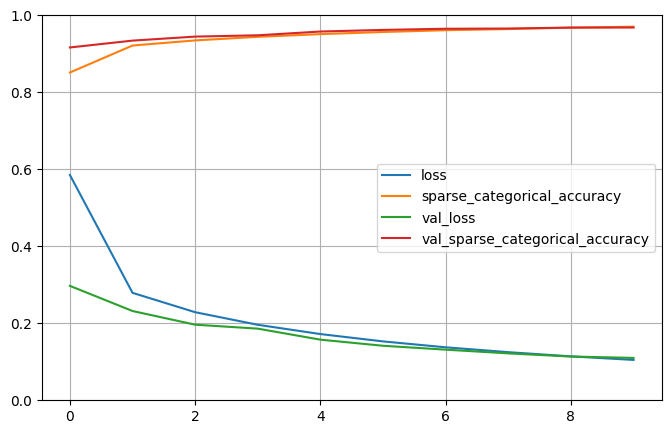

In [15]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [16]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1327 - sparse_categorical_accuracy: 0.9608


[0.11197266727685928, 0.9666000008583069]

In [17]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

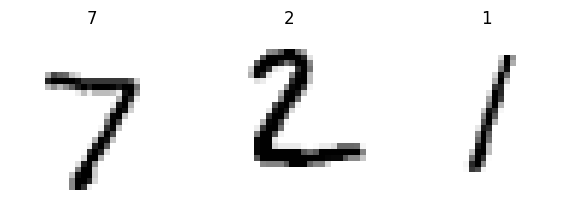

In [18]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(y_test[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [21]:
model.save("my_keras_model.keras")

In [23]:
model = keras.models.load_model("my_keras_model.keras")
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

Otras caracterísiticas interesantes de Keras https://keras.io/examples/: 
- Callbacks
- Tensorboard
- Subclassing API
- Functional API
- Model Subclassing
- Custom Layers
- Custom Models
- Custom Losses


## Pytorch

In [36]:
from torch.nn import Sequential as S
from torch.nn import Linear as L
from torch.nn import ReLU as R

model = S(L(784,128),R(),L(128,10)).cpu()

In [39]:
from tqdm import tqdm
import torch

X_train2 = torch.from_numpy(X_train).cpu().float().view(-1, 28*28)
y_train2 = torch.from_numpy(y_train).cpu().long()
bs = 32
num_batches = len(X_train2) // bs

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(10):
	for b in tqdm(range(num_batches)):
		x = X_train2[b*bs:(b+1)*bs]
		y = y_train2[b*bs:(b+1)*bs]
		y_hat = model(x)
		loss = loss_fn(y_hat, y)
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()
	print(f"Epoch {epoch+1} loss: {loss.item():.3f}")

  0%|          | 0/1718 [00:00<?, ?it/s]

100%|██████████| 1718/1718 [00:01<00:00, 1247.84it/s]


Epoch 1 loss: 0.065


100%|██████████| 1718/1718 [00:01<00:00, 1196.22it/s]


Epoch 2 loss: 0.043


100%|██████████| 1718/1718 [00:01<00:00, 1204.23it/s]


Epoch 3 loss: 0.041


100%|██████████| 1718/1718 [00:01<00:00, 1208.14it/s]


Epoch 4 loss: 0.036


100%|██████████| 1718/1718 [00:01<00:00, 1205.16it/s]


Epoch 5 loss: 0.041


100%|██████████| 1718/1718 [00:01<00:00, 1173.73it/s]


Epoch 6 loss: 0.028


100%|██████████| 1718/1718 [00:01<00:00, 1171.23it/s]


Epoch 7 loss: 0.015


100%|██████████| 1718/1718 [00:01<00:00, 1159.12it/s]


Epoch 8 loss: 0.006


100%|██████████| 1718/1718 [00:01<00:00, 1176.13it/s]


Epoch 9 loss: 0.021


100%|██████████| 1718/1718 [00:01<00:00, 1182.21it/s]

Epoch 10 loss: 0.009


In [41]:
def evaluate(model, X_test, y_test):
	acc = 0
	with torch.no_grad():
		for b in range(num_batches):
			x = X_test[b*bs:(b+1)*bs]
			y = y_test[b*bs:(b+1)*bs]
			y_hat = model(x)
			acc += torch.sum(torch.argmax(y_hat, dim=1) == y).item()
	return acc

X_test2 = torch.from_numpy(X_test).cpu().float().view(-1, 28*28)
y_test2 = torch.from_numpy(y_test).cpu().long()

acc = evaluate(model, X_test2, y_test2)
print(f"Accuracy: {acc} / {len(X_test2)}")

Accuracy: 9752 / 10000


# Pytorch

In [1]:
import torch

torch.__version__

'2.4.1'

In [2]:
class Dataset(torch.utils.data.Dataset):

    # constructor
    def __init__(self, X, Y):
        self.X = torch.tensor(X).float()
        self.Y = torch.tensor(Y).long()

    # cantidad de muestras en el dataset
    def __len__(self):
        return len(self.X)

    # devolvemos el elemento `ix` del dataset
    def __getitem__(self, ix):
        return self.X[ix], self.Y[ix]

In [3]:
class Model(torch.nn.Module):

    # constructor
    def __init__(self, D_in=784, H=100, D_out=10):

        # llamamos al constructor de la clase madre
        super(Model, self).__init__()

        # definimos nuestras capas
        self.fc1 = torch.nn.Linear(D_in, H)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(H, D_out)

    # lógica para calcular las salidas de la red
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [5]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
X, Y = mnist["data"].values.astype(np.float32), mnist["target"].values.astype(int)

In [6]:
# instanciamos nuestro dataset y dataloader
dataset = {
    "train": Dataset(X[:60000] / 255., Y[:60000]),
    "val": Dataset(X[60000:] / 255., Y[60000:])
}
dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=100),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=100)
}

# instanciamos nuestro modelo
model = Model(784, 100, 10)

# definimos la función de pérdida y el optimizador
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# bucle de entrenamiento
epochs = 5
for e in range(1, epochs+1):
    print(f"epoch: {e}/{epochs}")

    # entrenamiento
    model.train()
    for batch_ix, (x, y) in enumerate(dataloader['train']):
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        if batch_ix % 100 == 0:
            loss, current = loss.item(), (batch_ix + 1) * len(x)
            print(f"loss: {loss:.4f} [{current:>5d}/{len(dataset['train']):>5d}]")

    # validación
    model.eval()
    val_loss, val_acc = [], []
    with torch.no_grad():
        for batch_ix, (x, y) in enumerate(dataloader['val']):
            outputs = model(x)
            loss = criterion(outputs, y)
            val_loss.append(loss.item())
            val_acc.append((outputs.argmax(1) == y).float().mean().item())
    print(f"val_loss: {np.mean(val_loss):.4f} val_acc: {np.mean(val_acc):.4f}")

epoch: 1/5
loss: 2.2963 [  100/60000]
loss: 0.4565 [10100/60000]
loss: 0.4773 [20100/60000]
loss: 0.3350 [30100/60000]
loss: 0.2544 [40100/60000]
loss: 0.2853 [50100/60000]
val_loss: 0.2428 val_acc: 0.9293
epoch: 2/5
loss: 0.2073 [  100/60000]
loss: 0.2338 [10100/60000]
loss: 0.2339 [20100/60000]
loss: 0.2243 [30100/60000]
loss: 0.1691 [40100/60000]
loss: 0.1911 [50100/60000]
val_loss: 0.1755 val_acc: 0.9482
epoch: 3/5
loss: 0.1533 [  100/60000]
loss: 0.1806 [10100/60000]
loss: 0.1673 [20100/60000]
loss: 0.1986 [30100/60000]
loss: 0.1236 [40100/60000]
loss: 0.1458 [50100/60000]
val_loss: 0.1427 val_acc: 0.9578
epoch: 4/5
loss: 0.1282 [  100/60000]
loss: 0.1417 [10100/60000]
loss: 0.1302 [20100/60000]
loss: 0.1734 [30100/60000]
loss: 0.0904 [40100/60000]
loss: 0.1174 [50100/60000]
val_loss: 0.1236 val_acc: 0.9628
epoch: 5/5
loss: 0.1090 [  100/60000]
loss: 0.1144 [10100/60000]
loss: 0.1042 [20100/60000]
loss: 0.1409 [30100/60000]
loss: 0.0726 [40100/60000]
loss: 0.0979 [50100/60000]
val

Mejorando las prestaciones

In [7]:
# aumentamos el tamaño del batch para aprovechar la GPU, carga en paralelo y movemos los datos a la GPU
dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=1000, shuffle=True, num_workers=4, pin_memory=True),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=1000, num_workers=4, pin_memory=True)
}

model = Model(784, 100, 10)
# compilamos el modelo
# model = torch.compile(model)
# torch.backends.cuda.matmul.allow_tf32 = True # allow tf32 on matmul
# torch.backends.cudnn.allow_tf32 = True # allow tf32 on cudnn
# movemos el modelo a la GPU
model.cuda()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
epochs = 5
for e in range(1, epochs+1):
    print(f"epoch: {e}/{epochs}")

    # entrenamiento
    model.train()
    for batch_ix, (x, y) in enumerate(dataloader['train']):
        # movemos los datos a la GPU
        x, y = x.cuda(), y.cuda()                                                  
        optimizer.zero_grad()
        # automatic mixed precision
        with torch.autocast(device_type='cuda', dtype=torch.bfloat16):              
            outputs = model(x)
            loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        if batch_ix % 10 == 0:
            loss, current = loss.item(), (batch_ix + 1) * len(x)
            print(f"loss: {loss:.4f} [{current:>5d}/{len(dataset['train']):>5d}]")

    # validación
    model.eval()
    val_loss, val_acc = [], []
    with torch.no_grad():
        for batch_ix, (x, y) in enumerate(dataloader['val']):
            # movemos los datos a la GPU
            x, y = x.cuda(), y.cuda()   
            # automatic mixed precision                                            
            with torch.autocast(device_type='cuda', dtype=torch.bfloat16):          
                outputs = model(x)
                loss = criterion(outputs, y)
            val_loss.append(loss.item())
            val_acc.append((outputs.argmax(1) == y).float().mean().item())
    print(f"val_loss: {np.mean(val_loss):.4f} val_acc: {np.mean(val_acc):.4f}")

epoch: 1/5
loss: 2.3076 [ 1000/60000]
loss: 1.7508 [11000/60000]
loss: 1.2068 [21000/60000]
loss: 0.8019 [31000/60000]
loss: 0.6379 [41000/60000]
loss: 0.4926 [51000/60000]
val_loss: 0.4332 val_acc: 0.8890
epoch: 2/5
loss: 0.4225 [ 1000/60000]
loss: 0.3950 [11000/60000]
loss: 0.3943 [21000/60000]
loss: 0.3933 [31000/60000]
loss: 0.3667 [41000/60000]
loss: 0.3247 [51000/60000]
val_loss: 0.3127 val_acc: 0.9138
epoch: 3/5
loss: 0.3250 [ 1000/60000]
loss: 0.3535 [11000/60000]
loss: 0.3100 [21000/60000]
loss: 0.2953 [31000/60000]
loss: 0.2318 [41000/60000]
loss: 0.2830 [51000/60000]
val_loss: 0.2667 val_acc: 0.9246
epoch: 4/5
loss: 0.2702 [ 1000/60000]
loss: 0.2430 [11000/60000]
loss: 0.2296 [21000/60000]
loss: 0.2909 [31000/60000]
loss: 0.2786 [41000/60000]
loss: 0.2419 [51000/60000]
val_loss: 0.2387 val_acc: 0.9315
epoch: 5/5
loss: 0.2345 [ 1000/60000]
loss: 0.2183 [11000/60000]
loss: 0.2509 [21000/60000]
loss: 0.2216 [31000/60000]
loss: 0.2192 [41000/60000]
loss: 0.2228 [51000/60000]
val